In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytesseract

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install tesseract

Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract
import cv2
import seaborn as sb
import tensorflow as tf
conf = r'-- oem 2'
#pytesseract.pytesseract.tesseract_cmd = '/home/mohanakrishnan/.pyenv/versions/3.8.12/envs/quotes_for_posts_783/lib/python3.8/site-packages' 

2022-03-02 02:14:30.079682: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mohanakrishnan/.pyenv/versions/3.8.12/envs/quotes_for_posts_783/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-02 02:14:30.079768: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
df = pd.read_csv('../raw_data/images_name.csv')
#data = pd.read_csv('../raw_data/quotes.csv')
df_im = df.tail(50)

In [6]:
df_im

,image_name,longest_comment,comments_5
32485,98377566,Two brown and white dogs lift their ears and l...,158725 Two brown and white dogs lift their ...
32486,984092829,two loggers work on removing the bark from a ...,158730 two loggers work on removing the ba...
32487,98415168,An officer writing up a ticket in a heavily cr...,158735 An officer writing up a ticket in a ...
32488,98438433,Two mannequins are standing in the window behi...,158740 Two mannequins are standing in the w...
32489,98492339,Two men wearing white are performing a martial...,158745 Two men wearing white are performing...
32490,984950,group of men relaxing after a long hard day at...,158750 group of men relaxing after a long h...
32491,984950,ven men sit cross-legged on a roof amid constr...,158751 ven men sit cross-legged on a roof a...
32492,984950,group of men are sitting down on the ground to...,158752 group of men are sitting down on the...
32493,984950,group of men sitting on the roof of a building .,158753 group of men sitting on the roof of ...
32494,984950,group of men sit in a circle on a rooftop .,158754 group of men sit in a circle on a ro...


In [7]:
images = df_im['image_name']
titles = df_im['longest_comment']

In [8]:
images = list(images)
titles = list(titles)

In [9]:
imgs = []
for i in images:
    imgs.append(mpimg.imread(f'../raw_data/flickr30k_images/{i}.jpg'))

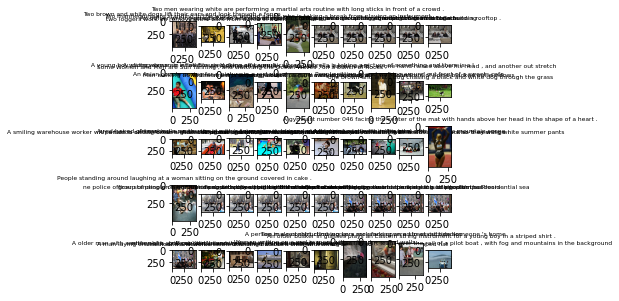

In [10]:
plt.figure(figsize=(5,5))
for i in range(50):
    plt.subplot(5,10, i+1)
    img = imgs[i]
    title = titles[i]
    plt.imshow(img)
    plt.title(title, fontsize=6)

Text(0.5, 1.0, ' two loggers work on removing the bark from a tree in a field of wheat .')

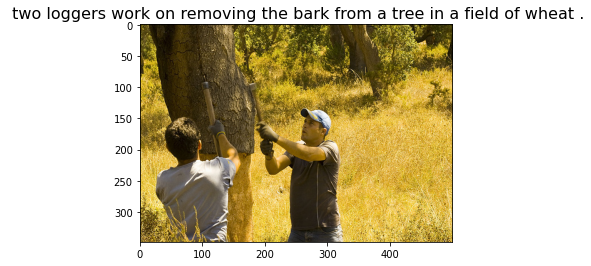

In [11]:
img = imgs[1]
title = titles[1]
plt.imshow(img)
plt.title(title, fontsize=16)

In [12]:
data = {
    'photo_name' : [],
    'flattenPhoto' : [],
    'text' : [],
    }

In [13]:
MyModel = tf.keras.models.Sequential()
MyModel.add(tf.keras.applications.ResNet50(
    include_top = False, weights='imagenet',    pooling='avg',
))
MyModel.layers[0].trainable = False

2022-03-02 02:14:38.349244: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-02 02:14:38.349807: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mohanakrishnan/.pyenv/versions/3.8.12/envs/quotes_for_posts_783/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-02 02:14:38.349905: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mohanakrishnan/.pyenv/versions/3.8.12/envs/quotes_for_posts_783/lib/python3.8/site-packages/cv2/../../lib64:
2022-03-02 02:14:38.349979: W tensorflow/stream_execu

In [14]:
def LoadDataAndDoEssentials(path, h, w):
    img = mpimg.imread(path)
    data['text'].append(pytesseract.image_to_string(img, config = conf))
    img = cv2.resize(img, (h, w))
    ## Expanding image dims so this represents 1 sample
    img = np.expand_dims(img, 0)
    img = tf.keras.applications.resnet50.preprocess_input(img)
    extractedFeatures = MyModel.predict(img)
    extractedFeatures = np.array(extractedFeatures)
    data['flattenPhoto'].append(extractedFeatures.flatten())

In [15]:
def ReadAndStoreMyImages(path):
    for i in images:
        imgs.append(mpimg.imread(f'../raw_data/flickr30k_images/{i}.jpg'))
        data['photo_name'].append(i)
        imagePath = f"{path}/{i}.jpg"
        LoadDataAndDoEssentials(imagePath, 224, 224)

In [16]:
ReadAndStoreMyImages('../raw_data/flickr30k_images/')

TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

In [ ]:
Training_Feature_vector = np.array(data['flattenPhoto'], dtype = 'float64')
from sklearn.cluster import AgglomerativeClustering
kmeans = AgglomerativeClustering(n_clusters = 5)
kmeans.fit(Training_Feature_vector)

In [ ]:
dimReducedDataFrame = pd.DataFrame(Training_Feature_vector)
dimReducedDataFrame = dimReducedDataFrame.rename(columns = { 0: 'V1', 1 : 'V2'})
#dimReducedDataFrame['Category'] = list (df['Class_of_image'])
plt.figure(figsize = (10, 5))
sb.scatterplot(data = dimReducedDataFrame, x = 'V1', y = 'V2')
plt.grid(True)
plt.show()

In [ ]:
dimReducedDataFrame